# Lauren Jordan- Project 2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In this section, we will create as well as test a function that will simulate daily stock prices, referred to as runs.

In [2]:
def simulate_stock(start,rate,vol,days):
    daily_yields=np.random.normal(loc=rate/252,scale=vol/(252**0.5),size=days)
    cumulative_yields=np.cumsum(daily_yields)
    daily_multipliers=np.array(np.exp(cumulative_yields))
    daily_prices=np.round(daily_multipliers*start,decimals=2)
    daily_prices=np.concatenate((start,daily_prices),axis=None)
    return daily_prices

We will now test test the simulate_stock function.

<function matplotlib.pyplot.show(close=None, block=None)>

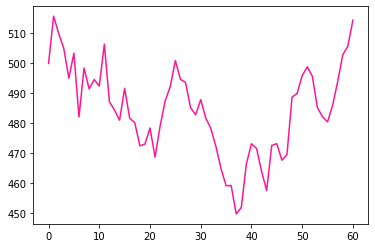

In [3]:
np.random.seed(1)
test_run=simulate_stock(start=500,rate=0.08,vol=0.3,days=60)
plt.plot(test_run,color='deeppink')
plt.show

## Part B: Annual Yield Function
In this section, we will create and run a function that calculates the annual yield during any particular run.

In [4]:
def find_yield(run):
    annual_yield=math.log(run[-1]/run[0])*(252/(len(run)-1))
    return round(annual_yield,4)

We will now test the find_yield function by running it on the previously simulated run.

In [5]:
print(find_yield(test_run))

0.1196


The next cell will explore possible variabilities in our simulation runs by creating as well as plotting 25 simulated runs.

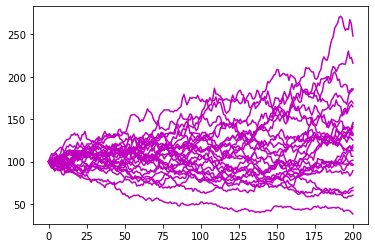

In [6]:
test_25_yield=[]
for i in range(0,25):
    test=simulate_stock(start=100,rate=0.06,vol=0.4,days=200)
    plt.plot(test,color='m')
    test_25_yield.append(find_yield(test))
plt.show()

The next cell will display the simulated yields of the 25 runs in the previous cell.

In [7]:
print(test_25_yield)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
This section will find a series of seeds through trial and error that will result in specific outcomes.

In the cell below, Stock A has the highest simulated final price.

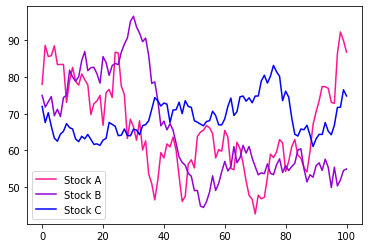

In [8]:
np.random.seed(7)
Stock_A=simulate_stock(start=78,rate=0.04,vol=1.2,days=100)
Stock_B=simulate_stock(start=75,rate=0.08,vol=0.8,days=100)
Stock_C=simulate_stock(start=72,rate=0.16,vol=0.6,days=100)

plt.plot(Stock_A, label='Stock A', color='deeppink')
plt.plot(Stock_B, label='Stock B', color='darkviolet')
plt.plot(Stock_C, label='Stock C', color='blue')
plt.legend()
plt.show()

In the cell below, Stock B has the highest simulated final price.

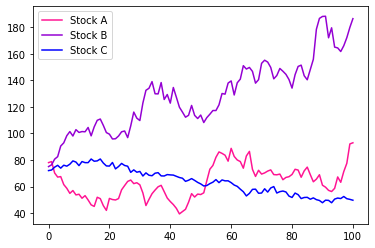

In [9]:
np.random.seed(16)
Stock_A=simulate_stock(start=78,rate=0.04,vol=1.2,days=100)
Stock_B=simulate_stock(start=75,rate=0.08,vol=0.8,days=100)
Stock_C=simulate_stock(start=72,rate=0.16,vol=0.6,days=100)

plt.plot(Stock_A, label='Stock A', color='deeppink')
plt.plot(Stock_B, label='Stock B', color='darkviolet')
plt.plot(Stock_C, label='Stock C', color='blue')
plt.legend()
plt.show()

In the cell below, Stock C has the highest simulated final price.

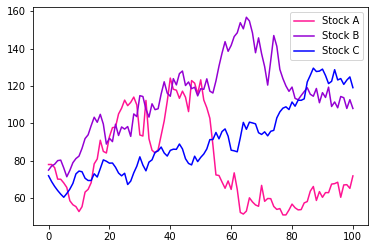

In [10]:
np.random.seed(9)
Stock_A=simulate_stock(start=78,rate=0.04,vol=1.2,days=100)
Stock_B=simulate_stock(start=75,rate=0.08,vol=0.8,days=100)
Stock_C=simulate_stock(start=72,rate=0.16,vol=0.6,days=100)

plt.plot(Stock_A, label='Stock A', color='deeppink')
plt.plot(Stock_B, label='Stock B', color='darkviolet')
plt.plot(Stock_C, label='Stock C', color='blue')
plt.legend()
plt.show()

## Part D: Monte Carlo Simulation
In this section, we will generate code that will be used to identify the range of possible outcomes and estimate their probabilities. This process is commonly referred to as the Monte Carlo Simulation.

In [11]:
def monte_carlo(start,rate,vol,days,num_runs):
    final_prices=[]
    annual_yields=[]
    for i in range(0,num_runs):
        daily_yields=np.random.normal(loc=rate/252,scale=vol/(252**0.5),size=days)
        cumulative_yields=np.cumsum(daily_yields)
        daily_multipliers=np.array(np.exp(cumulative_yields))
        daily_prices=np.round(daily_multipliers*start,decimals=2)
        run=np.concatenate((start,daily_prices),axis=None)
        
        final_prices.append(run[-1])
        annual_yield=math.log(run[-1]/run[0])*(252/(len(run)-1))
        annual_yields.append(annual_yield)
        
    return (np.array(final_prices), np.array(annual_yields))   

Now, we will test the aforementioned function by running a Monte Carlo simulation.

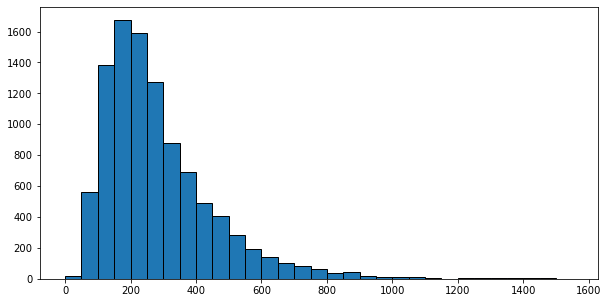

In [12]:
np.random.seed(1)
plt.figure(figsize=[10,5])
final,annual=monte_carlo(start=200,rate=0.1,vol=0.4,days=500,num_runs=10000)
plt.hist(final,bins=np.arange(0,1600,50),edgecolor='k')
plt.show()

Now the 10th, 25th, 50th, 75th, and 90th percentiles will be displayed below.

In [13]:
print(f'10th percentile: {np.round(np.percentile(final,10),decimals=2)}')
print(f'25th percentile: {np.round(np.percentile(final,25),decimals=2)}')
print(f'50th percentile: {np.round(np.percentile(final,50),decimals=2)}')
print(f'75th percentile: {np.round(np.percentile(final,75),decimals=2)}')
print(f'90th percentile: {np.round(np.percentile(final,90),decimals=2)}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
In this section, we will demonstrate the effects of volatility on stock prices by simulating two runs with identical features, except varying volatility ratings.

In [14]:
np.random.seed(1)
Stock_A_final,Stock_A_annual=monte_carlo(start=100,rate=0.12,vol=0.3,days=150,num_runs=10000)
Stock_B_final,Stock_B_annual=monte_carlo(start=100,rate=0.12,vol=0.7,days=150,num_runs=10000)

print(f'Average Annual Yield for A over 10000 runs: {np.round(np.average(Stock_A_annual),decimals=4)}')
print(f'Average Annual Yield for B over 10000 runs: {np.round(np.average(Stock_B_annual),decimals=4)}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Now, we will visually inspect the results of Stock A and Stock B by plotting histograms of the final prices.

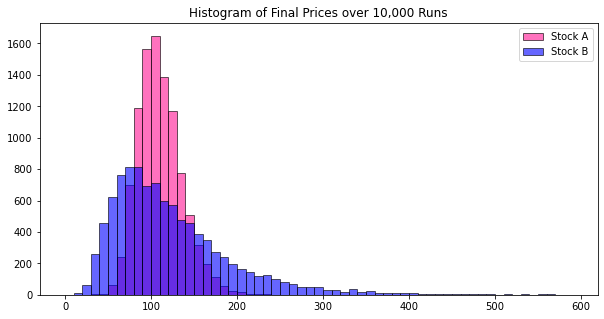

In [15]:
plt.figure(figsize=[10,5])
plt.hist(Stock_A_final,alpha = 0.6,bins=np.arange(0,600,10),edgecolor='k',color='deeppink',label='Stock A')
plt.hist(Stock_B_final,alpha = 0.6,bins=np.arange(0,600,10),edgecolor='k',color='blue',label='Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()
plt.show()

## Part F: Comparing Two Stocks
In this section, we will use our Monte Carlo function to estimate probabilities of two different stocks over time.

In [16]:
np.random.seed(1)
Stock_A_Final,Stock_A_Annual=monte_carlo(start=120,rate=0.08,vol=0.2,days=252,num_runs=10000)
Stock_B_Final,Stock_B_Annual=monte_carlo(start=120,rate=0.05,vol=0.5,days=252,num_runs=10000)

StockA_higherthan_StockB=np.count_nonzero(Stock_A_Final>Stock_B_Final)/len(Stock_A_Final)
StockA_higherthan_150=np.count_nonzero(Stock_A_Final>150)/len(Stock_A_Final)
StockB_higherthan_150=np.count_nonzero(Stock_B_Final>150)/len(Stock_B_Final)
StockA_lessthan_100=np.count_nonzero(Stock_A_Final<100)/len(Stock_A_Final)
StockB_lessthan_100=np.count_nonzero(Stock_B_Final<100)/len(Stock_B_Final)

print('Proportions of runs in which...')
print('-'*31)
print(f'A ends above B:   {np.round(StockA_higherthan_StockB,decimals=4)}')
print('')
print(f'A ends above 150: {np.round(StockA_higherthan_150,decimals=4)}')
print(f'B ends above 150: {np.round(StockB_higherthan_150,decimals=4)}')
print('')
print(f'A ends below 100: {np.round(StockA_lessthan_100,decimals=4)}')
print(f'B ends below 100: {np.round(StockB_lessthan_100,decimals=4)}')

Proportions of runs in which...
-------------------------------
A ends above B:   0.5206

A ends above 150: 0.2338
B ends above 150: 0.3619

A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff
The code below will demonstrate how the Monte Carlo function can be used to estimate the expected payoff of a simulated stock.

In [17]:
np.random.seed(1)
test_stock_final,test_stock_yield=monte_carlo(start=200,rate=0.11,vol=0.4,days=150,num_runs=10000)
strike225=np.where(test_stock_final-225>=0,test_stock_final-225,0)
avg_strike225=np.average(strike225)
print(f'The average call payoff over 10000 runs is ${round(avg_strike225,2):.2f}')

The average call payoff over 10000 runs is $27.10
